# 딥러닝 다중분류

In [2]:
import os
path = "C:/pytest/"
os.chdir(path)

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
df = df.sample(frac = 1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
6,4.6,3.4,1.4,0.3,setosa
141,6.9,3.1,5.1,2.3,virginica
114,5.8,2.8,5.1,2.4,virginica
77,6.7,3.0,5.0,1.7,versicolor
83,6.0,2.7,5.1,1.6,versicolor


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 6 to 11
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [12]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
import matplotlib.pyplot as plt

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

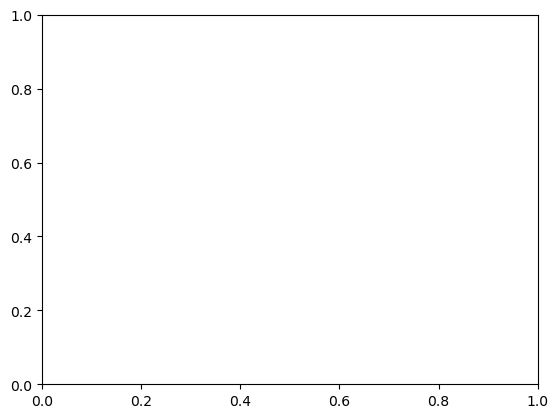

In [17]:
plt.boxplot(df, showmeans=True, meanline=True,labels=df.columns)
plt.show()

In [18]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [20]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y)
print(len(train_X), len(test_X), len(train_y), len(test_y))

112 38 112 38


### 문자열을 숫자형으로 변환

In [22]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(train_y)
train_y = e.transform(train_y)

print(train_y)

[2 2 1 1 1 0 1 0 2 2 1 1 1 0 0 0 1 2 1 0 1 1 1 2 2 1 0 2 0 0 0 0 0 0 0 0 1
 0 1 2 0 2 0 2 1 2 1 0 0 2 2 2 2 0 1 0 0 1 0 0 1 1 1 0 1 0 2 0 0 2 2 2 1 1
 2 0 0 1 2 1 1 1 1 0 0 0 0 1 2 2 1 0 1 2 0 0 2 2 1 0 2 1 1 1 0 2 1 1 0 2 0
 1]


In [24]:
e.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
e.inverse_transform(train_y)

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicol

In [27]:
for i in range(len(e.classes_)):
    print("{} : {}".format(i, e.classes_[i]) )

0 : setosa
1 : versicolor
2 : virginica


In [28]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
print(train_y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))
model.add(Dense(3,activation= 'softmax'))

In [32]:
model.compile(loss= "categorical_crossentropy", optimizer='rmsprop',metrics = ['acc'])
model.fit(train_X, train_y, epochs = 50, batch_size = 1)

Epoch 1/50
112/112 [==============================] - 1s 3ms/step - loss: 0.1152 - acc: 0.9732
Epoch 2/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1115 - acc: 0.9821
Epoch 3/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1060 - acc: 0.9821
Epoch 4/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1032 - acc: 1.0000
Epoch 5/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1023 - acc: 0.9821
Epoch 6/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0981 - acc: 0.9821
Epoch 7/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0980 - acc: 0.9732
Epoch 8/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0944 - acc: 0.9732
Epoch 9/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0906 - acc: 0.9911
Epoch 10/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0902 - acc: 0.9821
Epoch 11/50
112/112 [============================

In [34]:
# 테스트 데이터 원-핫 인코딩
test_y = e.transform(test_y)
print(test_y)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [35]:
test_y = to_categorical(test_y)

In [37]:
model.evaluate(test_X,test_y)[1]

2/2 [==============================] - 2s 3ms/step - loss: 0.1398 - acc: 0.9474


0.9473684430122375

In [38]:
os.chdir('C:/pytest/temp/model')

In [39]:
model.save('iris.h5')

In [40]:
from tensorflow.keras.models import load_model
loaded_model = load_model('iris.h5')

In [41]:
loaded_model.predict(test_X)

2/2 [==============================] - 0s 3ms/step


array([[1.34482269e-12, 1.72066152e-01, 8.27933908e-01],
       [1.32562396e-12, 4.01654430e-02, 9.59834635e-01],
       [5.67930121e-12, 5.42633571e-02, 9.45736587e-01],
       [1.85712033e-05, 9.97791529e-01, 2.18986883e-03],
       [3.83164583e-13, 1.35476002e-02, 9.86452460e-01],
       [9.11775805e-16, 8.11898848e-04, 9.99188125e-01],
       [2.16623312e-06, 9.95508432e-01, 4.48948564e-03],
       [1.80178650e-11, 5.54403588e-02, 9.44559693e-01],
       [2.94567391e-11, 1.68640278e-02, 9.83135998e-01],
       [6.81118912e-14, 4.12986754e-03, 9.95870054e-01],
       [9.99996305e-01, 3.70252201e-06, 2.17925138e-13],
       [1.32414046e-09, 3.05585623e-01, 6.94414437e-01],
       [8.54932680e-10, 4.25031036e-01, 5.74968934e-01],
       [9.99999642e-01, 3.74194542e-07, 2.94684139e-15],
       [5.83402955e-13, 1.59796756e-02, 9.84020352e-01],
       [2.43677328e-10, 1.96192801e-01, 8.03807259e-01],
       [1.60666829e-15, 1.16318243e-03, 9.98836815e-01],
       [6.91710928e-17, 1.05903

In [42]:
new_data ={'Sepal.Length': [5.3], 'Sepal.Width':[3.4],'Petal.Length':[1.4],'Petal.Width':[0.2]}
new_data = pd.DataFrame(new_data)

result = loaded_model.predict(new_data)

1/1 [==============================] - 0s 18ms/step


In [44]:
import numpy as np

In [45]:
result_idx = np.argmax(result)
if result_idx ==0:
    print('setosa')
elif result_idx == 1:
    print('versicolor')
elif result_idx == 2:
    print('virginica')

setosa


# 베스트 모델

In [48]:
os.chdir(path)
os.getcwd()

'C:\\pytest'

In [49]:
df = pd.read_csv('wine.csv', header = None)
# 첫 줄이 컬럼의 제목이 아니기 때문에 header를 None값을 줌
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [51]:
# train_test_split을 사용하기 때문에 섞지 않아도 됨
# df = df.sample(frac = 1)
# df.head()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [54]:
X = df.iloc[:,:12]
y = df.iloc[:,12]

In [55]:
train_X, test_X, train_y, test_y = train_test_split(X,y)
print(len(train_X),len(test_X), len(train_y), len(test_y))

4872 1625 4872 1625


In [60]:
sorted(df[11].unique())

[3, 4, 5, 6, 7, 8, 9]

In [62]:
model = Sequential()
model.add(Dense(30, activation = 'relu', input_dim = 12))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                390       
                                                                 
 dense_7 (Dense)             (None, 16)                496       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss= 'binary_crossentropy', optimizer = 'adam',metrics = ['acc'])
model.fit(train_X,train_y,epochs = 200, batch_size = 200)

Epoch 1/200
25/25 [==============================] - 0s 4ms/step - loss: 1.0522 - acc: 0.7198
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3879 - acc: 0.8147
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2477 - acc: 0.9099
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2113 - acc: 0.9273
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2060 - acc: 0.9284
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2018 - acc: 0.9302
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1979 - acc: 0.9337
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1949 - acc: 0.9335
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1907 - acc: 0.9341
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1893 - acc: 0.9366
Epoch 11/200
25/25 [==============================] - 0s 3m

25/25 [==============================] - 0s 4ms/step - loss: 0.0648 - acc: 0.9801
Epoch 88/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0603 - acc: 0.9809
Epoch 89/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0619 - acc: 0.9809
Epoch 90/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0600 - acc: 0.9815
Epoch 91/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0569 - acc: 0.9828
Epoch 92/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0600 - acc: 0.9830
Epoch 93/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0610 - acc: 0.9815
Epoch 94/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0586 - acc: 0.9828
Epoch 95/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0582 - acc: 0.9817
Epoch 96/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0658 - acc: 0.9772
Epoch 97/200
25/25 [==============================] - 0s 3ms/st

25/25 [==============================] - 0s 3ms/step - loss: 0.0522 - acc: 0.9838
Epoch 173/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0488 - acc: 0.9854
Epoch 174/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0495 - acc: 0.9850
Epoch 175/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0432 - acc: 0.9877
Epoch 176/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0457 - acc: 0.9867
Epoch 177/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0447 - acc: 0.9862
Epoch 178/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0462 - acc: 0.9854
Epoch 179/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0496 - acc: 0.9846
Epoch 180/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0453 - acc: 0.9873
Epoch 181/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0473 - acc: 0.9840
Epoch 182/200
25/25 [==============================] -

In [67]:
evaluation = model.evaluate(test_X,test_y)
print('loss : {:.2f}\naccuracy : {:.2f}'.format(evaluation[0],evaluation[1]*100))

51/51 [==============================] - 0s 3ms/step - loss: 0.0627 - acc: 0.9809
loss : 0.06
accuracy : 98.09
